In [1]:
from utils import *
%matplotlib inline
dir_name  = "/nrs/ahrens/Takashi/01292020/"
file_name_list = ["Fish1-1","Fish2-1","Fish3-1","Fish4-1","Fish5-1","Fish6-1"]

In [4]:
swimdata = np.load(dir_name+file_name_list[0]+"/swim/swimdata.npy", allow_pickle=True)[()]
rawdata = np.load(dir_name+file_name_list[0]+"/swim/rawdata.npy",  allow_pickle=True)[()]
swim_start = swimdata['swimStartIndT']
swim_end = swimdata['swimEndIndT']
num_swim = len(swim_start)
swim_type = np.zeros(len(swim_start)) # low, high, replay
swim_length = swim_end - swim_start
down_samp = 20
swim_len = swim_length.max()//down_samp
swim_power = np.zeros((num_swim, swim_len))

for n_ in range(num_swim):
    p1 = np.clip(swimdata['fltCh1']-swimdata['back1'],0, np.inf)
    p2 = np.clip(swimdata['fltCh2']-swimdata['back2'],0, np.inf)
    down_frame = swim_length[n_]//down_samp
    swim_pow = (p1+p2)[:down_samp*down_frame].reshape(-1, down_samp).mean(axis=-1) # downsample by down_samp
    swim_power[n_, :down_frame]=swim_pow
    swim_type[n_] = rawdata['stimParam3'][swim_start[n_]:swim_end[n_]].mean()

In [5]:
valid_swim = (swim_power>0).sum(axis=-1)>3

In [6]:
swim_power_low = swim_power[valid_swim & (swim_type==1) & (np.r_[swim_type[0], swim_type[:-1]]==1)]
swim_power_high = swim_power[valid_swim & (swim_type==3) & (np.r_[swim_type[0], swim_type[:-1]]==3)]

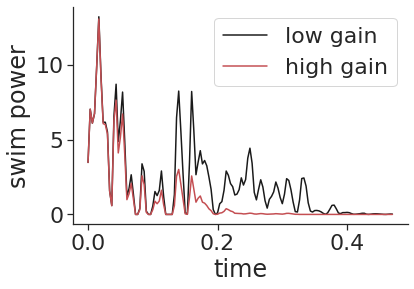

In [11]:
plt.plot(np.arange(swim_len)/6000*down_samp, swim_power_low.mean(axis=0)*100000, '-k', label='low gain')
plt.plot(np.arange(swim_len)/6000*down_samp, swim_power_high.mean(axis=0)*100000, '-r', label='high gain')
plt.xlabel('time')
sns.despine()
plt.ylabel('swim power')
plt.legend()
plt.show()

## check gain adaption

Fish1-1


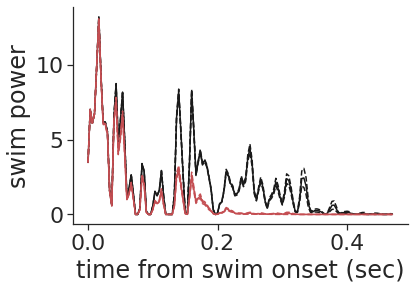

Fish2-1


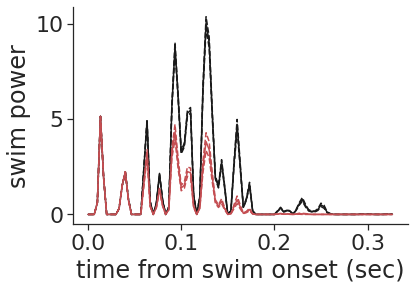

Fish3-1


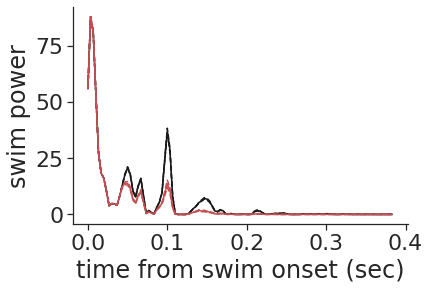

Fish4-1


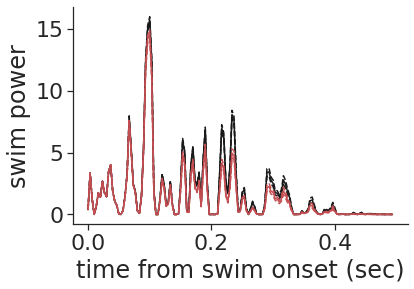

Fish5-1


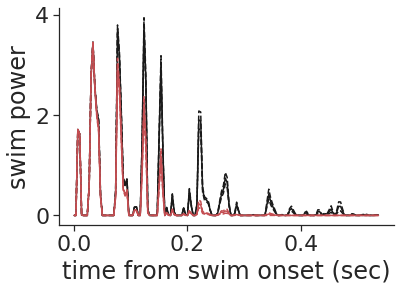

Fish6-1


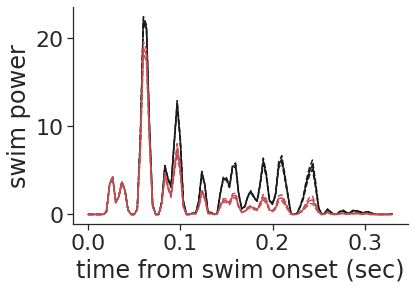

In [73]:
GA_degree=np.zeros(len(file_name_list))
for m, nfile in enumerate(file_name_list):
    print(nfile)
    swimdata = np.load(dir_name+nfile+"/swim/swimdata.npy", allow_pickle=True)[()]
    rawdata = np.load(dir_name+nfile+"/swim/rawdata.npy",  allow_pickle=True)[()]
    swim_start = swimdata['swimStartIndT']
    swim_end = swimdata['swimEndIndT']
    num_swim = len(swim_start)
    swim_type = np.zeros(len(swim_start)) # low, high, replay
    swim_length = swim_end - swim_start
    down_samp = 20
    swim_len = swim_length.max()//down_samp
    swim_power = np.zeros((num_swim, swim_len))
    swim_stat = np.zeros(swim_len)

    for n_ in range(num_swim):
        p1 = np.clip(swimdata['fltCh1']-swimdata['back1'],0, np.inf)
        p2 = np.clip(swimdata['fltCh2']-swimdata['back2'],0, np.inf)
        down_frame = swim_length[n_]//down_samp
        swim_pow = (p1+p2)[:down_samp*down_frame].reshape(-1, down_samp).mean(axis=-1) # downsample by down_samp
        swim_power[n_, :down_frame]=swim_pow
        swim_type[n_] = rawdata['stimParam3'][swim_start[n_]:swim_end[n_]].mean()
    valid_swim = (swim_power>0).sum(axis=-1)>3
    swim_power_low = swim_power[valid_swim & (swim_type==1) & (np.r_[swim_type[0], swim_type[:-1]]==1)]
    swim_power_high = swim_power[valid_swim & (swim_type==3) & (np.r_[swim_type[0], swim_type[:-1]]==3)]
    plt.figure()
    mean_ = np.mean(swim_power_low, axis=0)
    std_ = np.std(swim_power_low, axis=0)/np.sqrt(len(swim_power_low)-1)
    plt.plot(np.arange(swim_len)/6000*down_samp, mean_*100000, '-k')
    plt.plot(np.arange(swim_len)/6000*down_samp, (mean_+std_)*100000, '--k')
    plt.plot(np.arange(swim_len)/6000*down_samp, (mean_-std_)*100000, '--k')
    mean_ = np.mean(swim_power_high, axis=0)
    std_ = np.std(swim_power_high, axis=0)/np.sqrt(len(swim_power_high)-1)
    plt.plot(np.arange(swim_len)/6000*down_samp, mean_*100000, '-r', label='after')
    plt.plot(np.arange(swim_len)/6000*down_samp, (mean_+std_)*100000, '--r')
    plt.plot(np.arange(swim_len)/6000*down_samp, (mean_-std_)*100000, '--r')
    plt.xlabel('time from swim onset (sec)')
    sns.despine()
    plt.ylabel('swim power')
#     plt.legend()
    plt.show()
    for ntime in range(swim_len):
        val, pval= ranksums(swim_power_low[:, ntime], swim_power_high[:, ntime])
        swim_stat[ntime] = (val>0) and (pval<0.05)
    GA_degree[m]=swim_stat.mean()

## check swim before and after replay

In [17]:
from scipy.stats import wilcoxon

Fish1-1
14


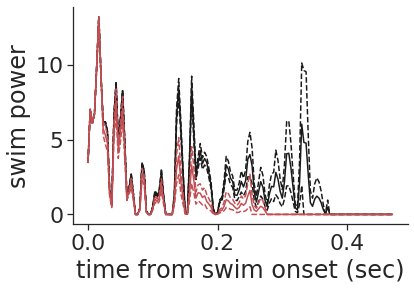

Fish2-1
9


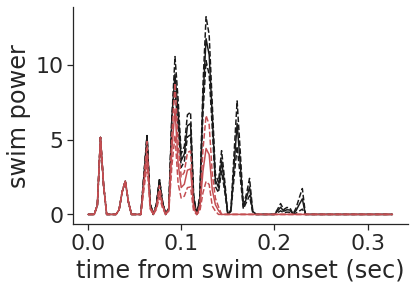

Fish3-1
6


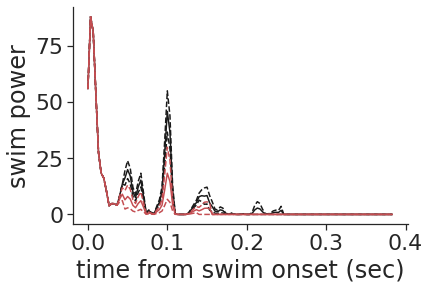

Fish4-1
10


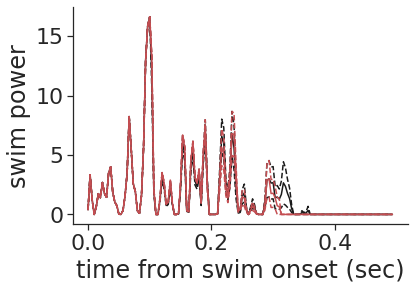

Fish5-1
4


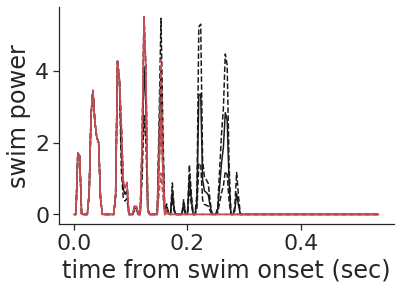

Fish6-1
15


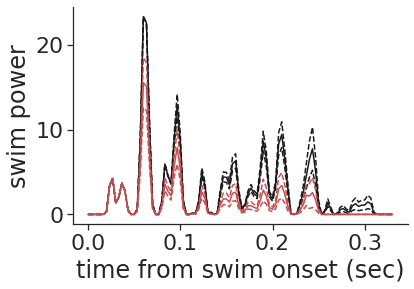

In [75]:
Replay_degree=np.zeros(len(file_name_list))
for m, nfile in enumerate(file_name_list):
    print(nfile)
    swimdata = np.load(dir_name+nfile+"/swim/swimdata.npy", allow_pickle=True)[()]
    rawdata = np.load(dir_name+nfile+"/swim/rawdata.npy",  allow_pickle=True)[()]
    swim_start = swimdata['swimStartIndT']
    swim_end = swimdata['swimEndIndT']
    num_swim = len(swim_start)
    swim_type = np.zeros(len(swim_start)) # low, high, replay
    swim_length = swim_end - swim_start
    down_samp = 20
    swim_len = swim_length.max()//down_samp
    swim_power = np.zeros((num_swim, swim_len))
    swim_stat = np.zeros(swim_len)

    for n_ in range(num_swim):
        p1 = np.clip(swimdata['fltCh1']-swimdata['back1'],0, np.inf)
        p2 = np.clip(swimdata['fltCh2']-swimdata['back2'],0, np.inf)
        down_frame = swim_length[n_]//down_samp
        swim_pow = (p1+p2)[:down_samp*down_frame].reshape(-1, down_samp).mean(axis=-1) # downsample by down_samp
        swim_power[n_, :down_frame]=swim_pow
        swim_type[n_] = rawdata['stimParam3'][swim_start[n_]:swim_end[n_]].mean()
    valid_swim = (swim_power>0).sum(axis=-1)>3
    
    replay_=rawdata['stimParam3']==2
    replay_start=np.where((~replay_[:-1])&(replay_[1:]))[0]+1
    replay_end=np.where((replay_[:-1])&(~replay_[1:]))[0]
    swim_=np.zeros(len(replay_)).astype('bool')
    for nswim in range(len(swim_start)):
        swim_[swim_start[nswim]:swim_end[nswim]]=True
    valid_replay=np.ones(len(replay_start))
    for nreplay in range(len(replay_start)):
        if swim_[replay_start[nreplay]:replay_end[nreplay]].sum()>100:
            valid_replay[nreplay]=False
    
    if valid_replay.sum()==0:
        continue
    
    swim_power_prev=[]
    swim_power_post=[]
    for n_ in np.where(valid_replay)[0]:
        prev_swim = (swim_end<replay_start[n_]).sum()-1
        post_swim = np.where(swim_start>replay_end[n_])[0][0]
        if (swim_type[prev_swim]==1) & (swim_type[post_swim]==1) & valid_swim[prev_swim] & valid_swim[post_swim]:
            swim_power_prev.append(swim_power[prev_swim])
            swim_power_post.append(swim_power[post_swim])
    if len(swim_power_prev)==0:
        continue
    swim_power_prev = np.array(swim_power_prev)
    swim_power_post = np.array(swim_power_post)
    
    print(len(swim_power_prev))
    
    plt.figure()
    mean_ = np.mean(swim_power_prev, axis=0)
    std_ = np.std(swim_power_prev, axis=0)/np.sqrt(len(swim_power_prev)-1)
    plt.plot(np.arange(swim_len)/6000*down_samp, mean_*100000, '-k', label='before')
    plt.plot(np.arange(swim_len)/6000*down_samp, (mean_+std_)*100000, '--k', label='before')
    plt.plot(np.arange(swim_len)/6000*down_samp, (mean_-std_)*100000, '--k', label='before')
    mean_ = np.mean(swim_power_post, axis=0)
    std_ = np.std(swim_power_post, axis=0)/np.sqrt(len(swim_power_prev)-1)
    plt.plot(np.arange(swim_len)/6000*down_samp, mean_*100000, '-r', label='after')
    plt.plot(np.arange(swim_len)/6000*down_samp, (mean_+std_)*100000, '--r', label='after')
    plt.plot(np.arange(swim_len)/6000*down_samp, (mean_-std_)*100000, '--r', label='after')
#     plt.plot(np.arange(swim_len)/6000*down_samp, (swim_power_prev-swim_power_post).mean(axis=0)*100000, '-b', label='before-after')
    plt.xlabel('time from swim onset (sec)')
    sns.despine()
    plt.ylabel('swim power')
#     plt.legend()
    plt.show()
    for ntime in range(swim_len):
        if np.abs(swim_power_prev[:, ntime]-swim_power_post[:, ntime]).sum()>0:
            val, pval= wilcoxon(swim_power_prev[:, ntime]-swim_power_post[:, ntime])
            swim_stat[ntime] = (val>0) and (pval<0.05)
    Replay_degree[m]=swim_stat.mean()

## Comparing adaption degree

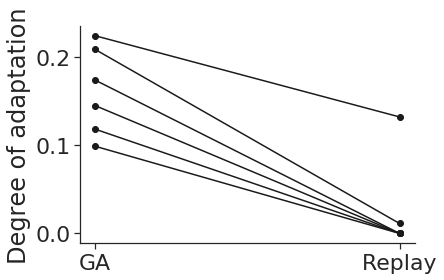

In [76]:
xlabel=['GA', 'Replay']
plt.figure()
for g_d, r_d in zip(GA_degree*0.4, Replay_degree*0.4):
    plt.plot([0, 1], [g_d, r_d], '-ok')
plt.xticks([0,1], xlabel)
plt.ylabel('Degree of adaptation')
sns.despine()
plt.show()